## Фільтри виділення кордонів

### Завдання:

 1.	Завантажте зображення та застосуйте до нього фільтр Собеля для виділення вертикальних та горизонтальних границь. Відобразіть результат.
 2.	Реалізуйте фільтр Canny для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат
 3.	Застосуйте фільтр Робертса для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат.
 4.	Порівняйте результати фільтрів Собеля, Кенні та Робертса для виділення границь на зображенні. Обгрунтуйте висновки.

## Розв'язок

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
img = cv2.imread('narcissus1.jpg')

### 1. Фільтр Sobel

In [75]:
# Конвертуємо зображення
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [76]:
# Визначаємо фільтри
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [77]:
sobel_x = cv2.filter2D(gray, -1, kernel_x)
sobel_y = cv2.filter2D(gray, -1, kernel_y)
sobel = sobel_x + sobel_y

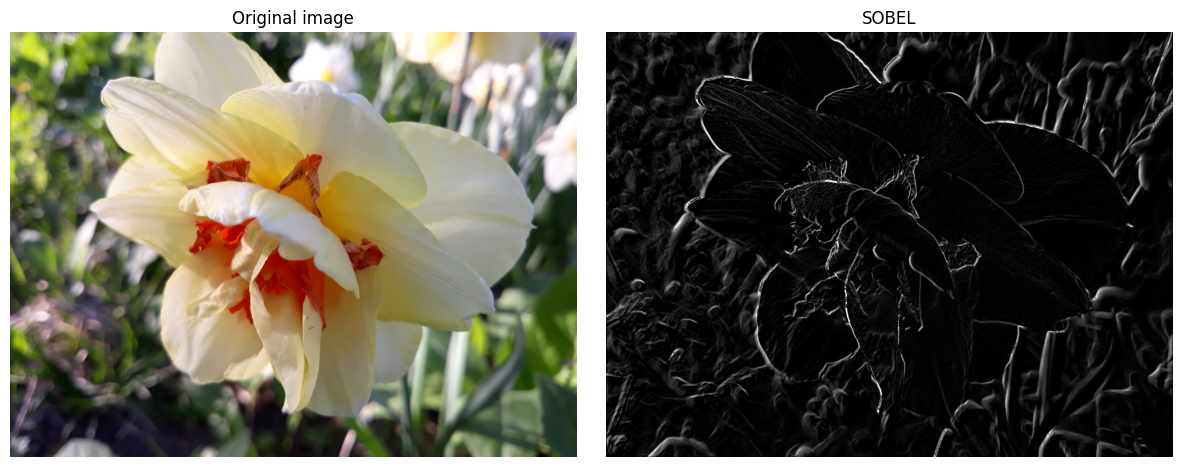

In [78]:
# Порівнюємо зображення
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sobel1 = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)
list_images = [img1, sobel1]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['Original image', 'SOBEL']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 2. Фільтр Canny

In [79]:
# Конвертуємо зображення
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [80]:
# Застосовуємо фільтр Canny
canny = cv2.Canny(gray, 50, 150)

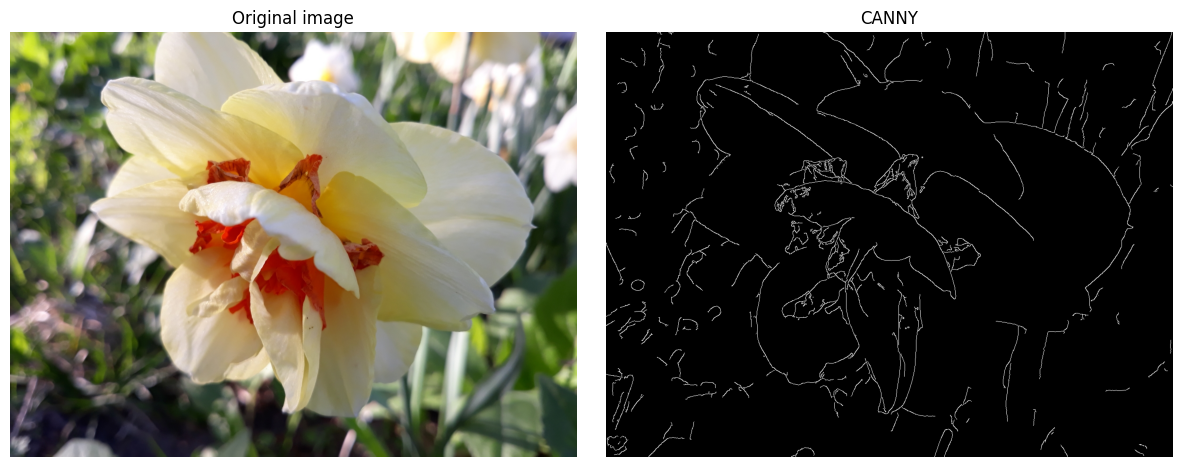

In [81]:
# Порівнюємо зображення
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny1 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
list_images = [img1, canny1]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['Original image', 'CANNY']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 3. Фільтр Roberts

In [82]:
# Конвертуємо зображення
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [83]:
# Створення ядер для фільтра Робертса
kernelx = np.array([[-1, 0], [0, 1]], dtype=np.float32)
kernely = np.array([[0, -1], [1, 0]], dtype=np.float32)

In [84]:
# Застосування фільтра Робертса до зображення
gx = cv2.filter2D(gray, -1, kernelx)
gy = cv2.filter2D(gray, -1, kernely)
g = gx + gy

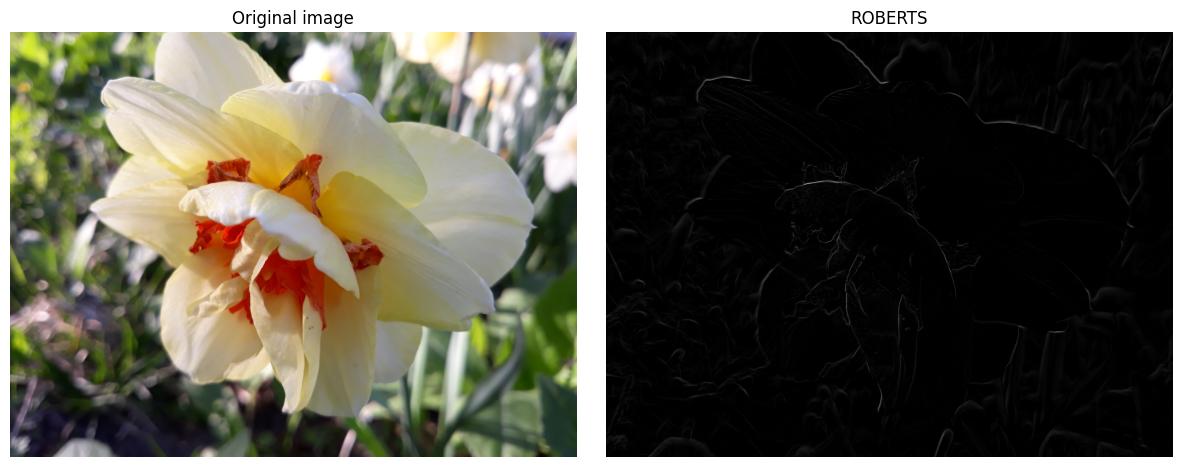

In [85]:
# Порівнюємо зображення
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
g1 = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
list_images = [img1, g1]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['Original image', 'ROBERTS']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 4. Порівняння результатів фільтрів Sobel, Canny та Roberts 

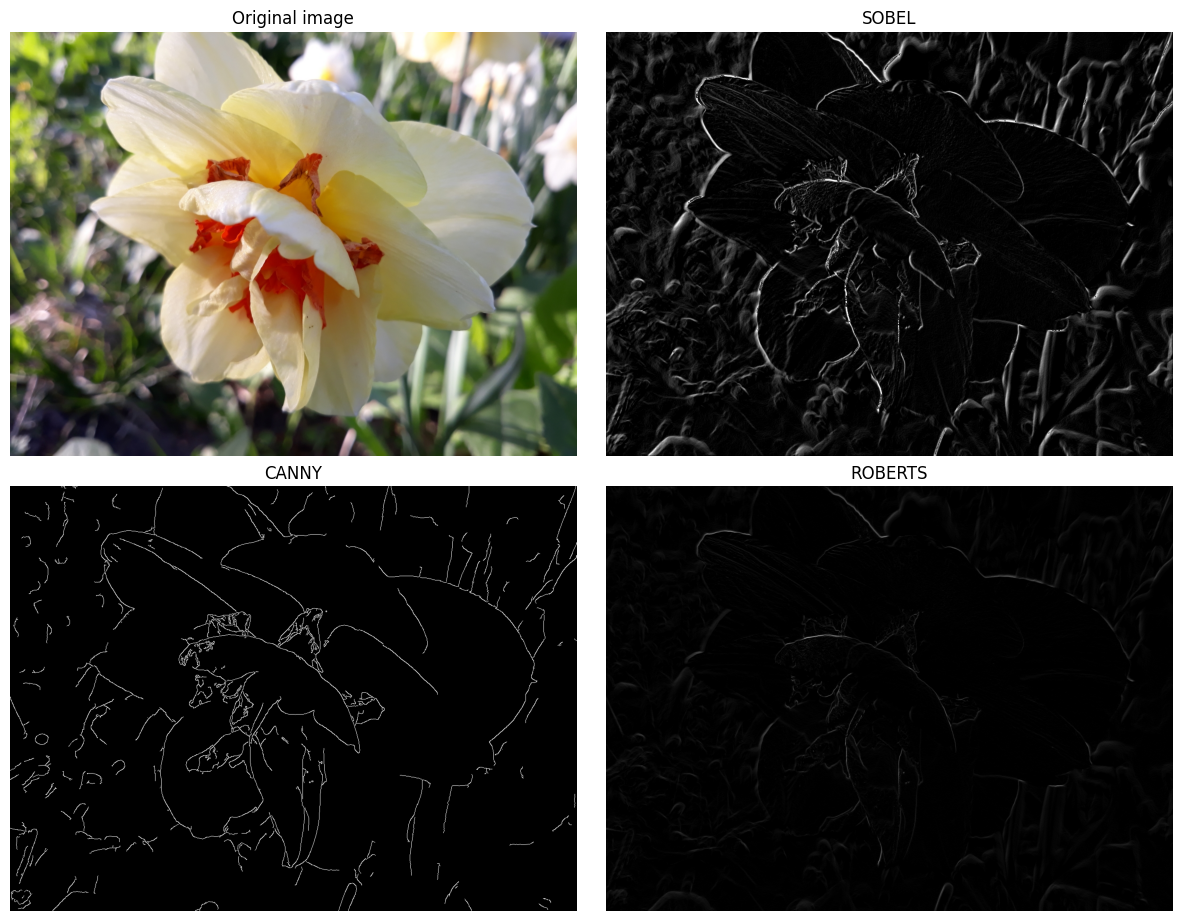

In [86]:
# Порівнюємо зображення
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sobel1 = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)
canny1 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
g1 = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
list_images = [img1, sobel1, canny1, g1]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),  # сітка 2 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['Original image', 'SOBEL', 'CANNY', 'ROBERTS']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

## Висновок

**Застосування фільтра Sobel дає на зображенні добре промаловані рельєфні елементи.**

**На мою думку, при застосуванні фільтра Canny отримали найкращий результат виділення основних об1єктів для подальшої роботи з зображенням.**

**Застосування фільтра Roberts показало найгірший результат, бо виділено тільки деякі контури на зображенні.**
